# Lab 9 Lecture

## Visualizing Data with Python

### Topics

* intro to data visualization
* pandasplot and matplotlib
* types of plots
* plot \~\*aesthetics\*\~
* plotting a map

### Exercises

You don't have any exercises for this week, but there is an extra credit lab exercise notebook in Canvas! It's worth the same as one week's lab, and will be added to your lab grade for the term if you submit it. I strongly recommend it!



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Visualization: a bird's-eye view


I assume you already know what data visualization *is*; The *real* question is *how* to visualize data AND *what* visualization to use.

There are many different kinds of data visualizations and which one is the best for any given situation is a loaded question.

![XKCD comic on data viz](https://imgs.xkcd.com/comics/self_description.png)

## What kinds of visulizations are there?

* Here is a semi-ugly-looking periodic table of visualization methods: [http://www.visual-literacy.org/periodic_table/periodic_table.html](http://www.visual-literacy.org/periodic_table/periodic_table.html)
* Here is a good website cataloguing many of the different types of visualizations: [http://www.datavizcatalogue.com](http://www.datavizcatalogue.com)
* For example, here is the information about [box charts](http://www.datavizcatalogue.com/methods/bar_chart.html)

When making a data visualization, you need to consider how various visual elements can convey the information you wish to show. There are many ways to represent quantitative information visually.

# Data Visualization in Python

There are many libraries for doing data visualization in Python, and none of them are perfect. Like pandas, they all have some clunky aspects, questionable design decisions, and esoteric features.

`matplotlib` is a very powerful data visualization toolkit for Python, but it is a bit clunky and old school.

There are newer alternatives to graphing in Python:
* [Seaborn](http://seaborn.pydata.org/#), built on top of matplotlib, provides an easier (and more asthetically pleasing) programming interface 
* [Bokeh](http://bokeh.pydata.org/en/latest/), which is great for displaying data on the web
* [Plotly](https://plot.ly/python/), which is a whole subscription based web service
* [plotnine](https://plotnine.readthedocs.io/en/stable/), a python implementation of the very popular visualization library GGPlot from R
* [Altair](https://altair-viz.github.io), which is a new *declarative* visualization library from one of the Jupyter developers

Still, `matplotlib` is the OG of the python data visualization libraries, so being familiar with it and its syntax is important. The `.plot` function in pandas uses `matplotlib` under the hood, and you can use `matplotlib` functions to change the way that pandas displays data.

# Data Visualization with Pandas


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

As an alternative to the `pyplot` or the object oriented interface, you can plot directly from `pandas` data structures. Pandas [has its own interface](https://pandas.pydata.org/pandas-docs/stable/visualization.html#) to matplotlib tied directly to the `Series` and `Dataframe` data structures.

I find this to be the most useful mechanism for visualizing data, but let's do some data visualization so we can get a sense for it.

In [ ]:
# create some random data
x = np.linspace(0, 10, 100)
# put that data into a dataframe
df = pd.DataFrame({"y":np.sin(x), "z":np.cos(x)}, index=x)
df.head()

,y,z
0.00000,0.000000,1.000000
0.10101,0.100838,0.994903
0.20202,0.200649,0.979663
0.30303,0.298414,0.954437
0.40404,0.393137,0.919480


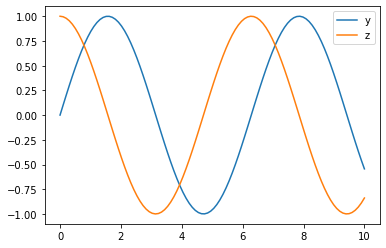

In [ ]:
df.plot()

So, aside from the actual content of the graph, we've seen this before.

Basically, you can add a `.plot()` to the end of any Pandas datastructure and it will make a best guess as to the best way to visualize it. This is highly context-dependent.

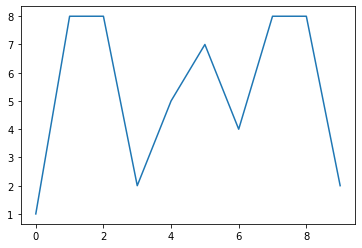

In [ ]:
# Plot data in a Series with the plot method
pd.Series(np.random.randint(0,10,10)).plot()

However, be careful calling `.plot()` all willy nilly since it doesn't always produce sensible results.

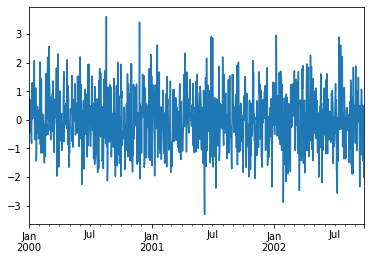

In [ ]:
# create some random time series data and create a default plot
random_series = pd.Series(np.random.randn(1000), 
                          index=pd.date_range('1/1/2000', periods=1000))
random_series.plot()

You can often use the `.plot()` method after performing some computation on the data. 

For example, we've looked at the [cumulative sum](http://www.variation.com/cpa/help/hs108.htm) (the cumulative sum of differences between the values and the average) before when looking at the community center data. 

For the cumulative sum, sloping up means above average, sloping down means below average.

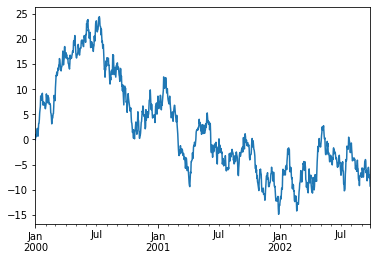

In [ ]:
# Plot the cumulative sum of a Series
random_series.cumsum().plot()

Up until now, we've been plotting Series, but we can just as easily use `.plot` with DataFrames.

In [ ]:
# create dataframe with four columns and create a default plot
df = pd.DataFrame(np.random.randn(1000, 4), index=random_series.index, columns=list('ABCD'))
df.head()

,A,B,C,D
2000-01-01,1.153222,-0.708176,2.229643,0.097716
2000-01-02,0.028030,0.164140,-0.525987,-0.020195
2000-01-03,1.630615,0.113967,-0.927796,0.426740
2000-01-04,-0.428486,0.489286,0.081188,0.883106
2000-01-05,-2.537322,-1.577938,0.239196,-0.824930


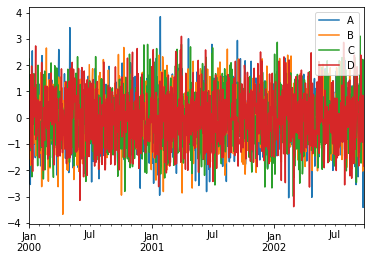

In [ ]:
df.plot()

The legend is kind of in the way there, so let's move it out of the way. This is where `pandas.plot()` being matplotlib under the hood is useful; you can use multiple interfaces to affect changes.

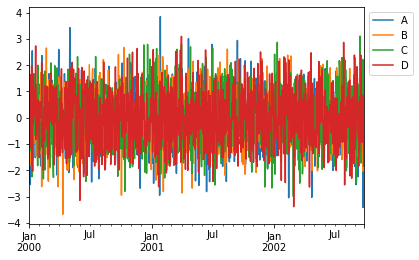

In [ ]:
# use the pandas interface to generate the plot
df.plot()
# use the pyplot interface to manipulate the plot
plt.legend(bbox_to_anchor=(1,1))

There we go! But that data is, well, literally random and very ugly. Let's try the cumulative sum, get something that looks a bit better.

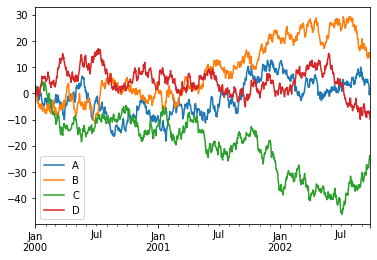

In [ ]:
# plot the cumulative sum of each column
df.cumsum().plot()

## Getting beyond the defaults

With pandas you can specify the kind of visualization with the `kind` parameter to `plot()`. The default isn't always what you want. For example:

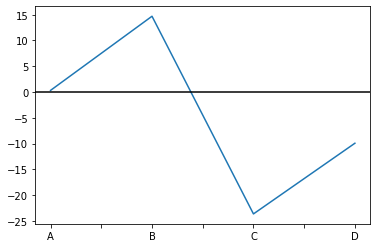

In [ ]:
# plot the sum of the columns
df.sum().plot()
# draw a black horizontal line at zero
plt.axhline(0, color='k')

This is a bad visualization. The line at zero implied an ordered relationship between these categories. pandas chose a line plot when a bar chart would've been better. So, let's change that!

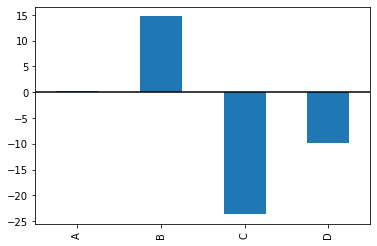

In [ ]:
# plot the sum of the columns as bars
df.sum().plot(kind='bar')
# draw a black horizontal line
plt.axhline(0, color='k')

Random data can be fun, but let's look at something a bit more understandable.

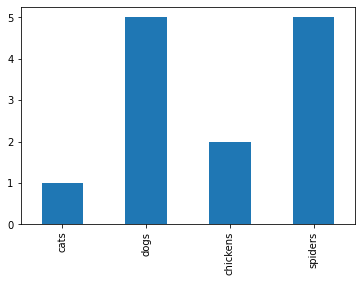

In [ ]:
# Create a bar chart using the index as the category labels
pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"]).plot.bar()

The labels are... weird. So, let's fix them!

----
### **Group Exercise**: fix my work

Your exercise is to find the documentation for the `plot()` method of a pandas Series. (Google is your friend.) What parameter should you specify so we can read the labels?

Here's your starter code, good luck!

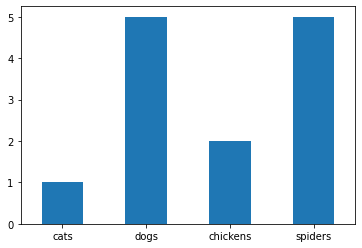

In [ ]:
animals = pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"])

# yr code here
#rot = 0 means horizontal x-labels
animals.plot(kind = "bar", rot = 0)

----

# pandas plot types

pandas provides a quick and easy interface to a bunch of different plot types; you don't even have to load `matplotlib` (although you do need `%matplotlib inline`, which is Jupyter-specific).

The secret to plotting is **Googling**, looking at other people's code, and trying things until it works. At least, that is how I do it.

What's nice about pandas/matplotlib integration is pandas will handle a lot of the boilerplate code for you, so you don't have to learn any ugly matplotlib syntax to do some pretty powerful plotting. You, as you discovered in that exercise, pass parameters to the `plot()` method to determine how the graph should look.

In [ ]:
# create some random categorical data
df2 = pd.DataFrame(np.random.randint(1,100,size=(7,4)), 
                   columns=['Carbs', 'Fats', 'Proteins', 'Other'], 
                   index=["M","Tu","W","Th","F","Sa","Su",])

# Plot a bar chart
df2.plot(kind="bar")

Bar charts can also be called directly using the `bar()` function.

In [ ]:
df2.plot.bar()

There are a bunch of parameters for these methods that let you tweak the vizualization. For example, the `stacked` parameter stacks the categorical values so you can easily compare within and across categories.

In [ ]:
df2.plot.bar(stacked=True, rot=0)

----
### **Group Exercise**: choose some plots

Try experimenting with other plot types! You can use Google, but I recommend reading through the list that you get when you use tab-completion on Jupyter.

In [ ]:
df2.plot.

Do the plots you've looked at make sense with the data?

----

## A bunch of plot options

Let's load in some sample data, and take a quick look at a bunch of different ways of visualising it!

In [ ]:
df = pd.read_csv("diabetes.csv")
# Drop the missing values rows
df = df.dropna()
df.head(5)

### Density Plot

Visualises the distribution of data over a continuous interval or time period. A variation of a histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. 

The peaks of a density plot help display where values are concentrated over the interval.

[You can read more about density plots here.](https://datavizcatalogue.com/methods/density_plot.html)

In [ ]:
df["chol"].plot.density()
df["weight"].plot.density()

### Box Plot

A convenient way of visually displaying the data distribution through their quartiles.

The lines extending parallel from the boxes are known as the whiskers and indicate variability outside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers. 

In [ ]:
df["chol"].plot.box()

### Histogram

Visualises the distribution of data over a continuous interval or certain time period. 

Each bar in a histogram represents the tabulated frequency at each interval/bin. Help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. 

[Read more here!](https://datavizcatalogue.com/methods/histogram.html)

In [ ]:
df["chol"].hist(bins=50)

In [ ]:
# use the bins parameter to adjust the granularity
df["chol"].hist(bins=10)

### Scatter Plot

You know what a scatterplot is. Use a collection of points placed using cartesian coördinates to display values from two variables. 

By displaying a variable in each axis, you can detect if a relationship or correlation between the two variables exists.

[Read more!](https://datavizcatalogue.com/methods/scatterplot.html)

In [ ]:
df.plot(kind='scatter', x='chol', y='weight', title="Cholesterol vs. Weight")

In [ ]:
# The c parameter may be given as the name of a column to provide colors for each point
df.plot(kind='scatter', x='chol', y='weight', 
        c='stab.glu', 
        title="Cholesterol vs. Weight")

In [ ]:
# the s parameter can be used to adjust the size of the points
df.plot(kind='scatter', x='chol', y='weight', 
        c='stab.glu', 
        s=df["height"], 
        title="Cholesterol vs. Weight")

### Scatterplot Matrix

Scatterplot matrices are a great way to roughly determine if you have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations. 

[More about them!](https://www.r-bloggers.com/scatterplot-matrices/)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb']], # Make a scatter matrix of all columns
               figsize=(30, 30), # Set plot size
               diagonal='kde')   # Show distribution estimates on diagonal

### Bubble Chart

Uses a Cartesian coordinate system to plot points along a grid where the X and Y axis are separate variables.

Each point is assigned a label or category. Each plotted point then represents a third variable by the area of its circle. Colors can be used to distinguish between categories or used to represent an additional data variable. 

Used to compare and show the relationships between categorised circles, by the use of positioning and proportions. The overall picture can be use to analyse for patterns/correlations.

In [ ]:
df.plot(kind='scatter', x='chol', y='weight', 
        c='hdl', 
        s=df['stab.glu'] / 2, 
        title="Cholesterol vs. Weight")

### Hexbin Plot

Hexbin plots can be a useful alternative to scatter plots or bubble charts if your data are too dense to plot each point individually.

In [ ]:
# generate a hexbin plot
df.plot.hexbin(x='chol', y='weight', gridsize=20)

In [ ]:
# use the gridsize parameter to adjust the granularity
df.plot.hexbin(x='chol', y='weight', gridsize=50)

### Bar Chart

Uses either horizontal or vertical bars to show discrete, numerical comparisons across categories. 

One axis of the chart shows the specific categories being compared and the other axis represents a discrete value scale. 

Distinguished from histograms as they do not display continuous developments over an interval. The discrete data here is categorical data and therefore answers the question of "how many?" in each category.

[I wonder what this link does.](https://datavizcatalogue.com/methods/bar_chart.html)

In [ ]:
# For continuous data:

df["chol"].plot.bar()

Bar charts... have their drawbacks.

In [ ]:
# For discrete data
df["gender"].value_counts().sort_index().plot(kind='bar', rot=0)

### Pie Chart

Fun! Pie charts are fun. I'm hungry now.

In [ ]:
# For continuous data (pretty useless)
df[["chol"]].plot.pie(y='chol', subplots=False, figsize=(8, 4))

In [ ]:
# For discrete data
df["gender"].value_counts().sort_index().plot.pie(y='gender', 
                                                  subplots=False, 
                                                  figsize=(8, 4))

In [ ]:
# For discrete data
df["frame"].value_counts().sort_index().plot.pie(y='gender', 
                                                 subplots=False, 
                                                 figsize=(8, 4))

# Plot twist

We can format plots by passing parameters to the `plot()` function, or you can set features using `plt`.

In [ ]:
# Add a title with the title parameter
df2.plot.bar(stacked=True, title="Diet")

In [ ]:
# Same thing as above, but through the pyplot interface
df2.plot.bar(stacked=True)
plt.title("Diet")

Some things are easier with `pyplot` (`plt`), like tweaking x and y labels.

In [ ]:
df2.plot.bar(stacked=True)
plt.title("Diet")
plt.xlabel("Days")
plt.ylabel("Nutrients per day")

Let's make the y-axis bigger!

In [ ]:
# modify the y axis to start at zero and go to four
df2.plot(kind='bar', stacked=True, ylim=[0,350])
plt.title("Diet")
plt.xlabel("Days")
plt.ylabel("Nutrients per Day")

## Stylin'

To help with the overall aesthetic of your plots, you can set different styles. Some look better than others.

In [ ]:
# This is what happens when scientists do visual design
plt.style.use('classic')
df2.plot.bar(stacked=True)

You can see what styles are available using the following:

In [ ]:
plt.style.available

----
### **Group Exercise**: eye bleach

Using the data in `df2`, test out some different styles of plots! See what looks good to you.

----

# Plotting a map (or mapping a plot)

Quickly, I want to show you guys another type of plot. This one is slightly different than the rest because it uses `geopandas`. We're not going to go into too much detail today; instead, you guys should return to this section of the lecture when you're working on your final project and play around with the example code I've given you.

What we will see today is how to make a **choropleth map**. What does that mean? Let's see what the dataviz catalog [says about it](https://datavizcatalogue.com/methods/choropleth.html).

Basically, we're going to make a map of Pittsburgh that is colored in based on the data that we give it.

In [ ]:
import pandas as pd
import geopandas
%matplotlib inline

Let's grab a dataset on the number of steps in each neighborhood in Pittsburgh.

In [ ]:
# import dataset
steps = pd.read_csv("steps.csv")
# filter to important info
num_steps = steps.groupby("neighborhood").sum()['number_of_steps']
num_steps.sort_values(ascending=False)

---
Plotting with geopandas is as easy as plotting regularly. All we need is a shapefile, which we have handily provided for you in the `Neighborhoods` folder. Otherwise, you can get the same shapefile [here from the WPRDC](https://data.wprdc.org/dataset/neighborhoods1).

We read in the shapefile like we read in a `csv` file. But this time, we use geopandas. This creates a **geopandas dataframe** that acts very similar to a regular pandas dataframe. Notably, we can simply call `plot` on it like we did earlier with pandas dataframes.

In [ ]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

Just like that, we already have a cool map of Pittsburgh! 

Let's dig in a little deeper. There are a _lot_ of columns included with this shapefile (38 to be exact). Let's take a look at a few of them:

In [ ]:
neighborhoods[['hood','area','perimeter','geometry']]

Importantly, `hood` contains the name of the neighborhood. We will use that one later to add data to the frame. There are some interesting columns like `area` and `perimeter`, which may be useful for certain calculations. Feel free to explore the other columns later.

What makes a **geopandas dataframe** special, though, is the `geometry` column. That column contains the nitty-gritty data used to draw the shape of a neighborhood on our plots.

---
## Making the choropleth map

To make this map represent our data, we need to merge our steps dataframe with our map dataframe. This is as simple as a regular pandas merge (read: sometimes not very simple). Here, we merge `neighborhoods` with `num_steps` into a new geopandas dataframe called `steps_map`.

The parameters we use to make this work are as follows:
* `how='left'` This makes it so that if we are missing a step count for a neighborhood, the neighborhood won't be removed from the dataset
* `left_on='hood'` and `right_on='neighborhood'` match up the two columns that contain the neighborhood names. Note that `left_on` must be from the dataframe that you call merge on.

In [ ]:
# do the merge
steps_map = neighborhoods.merge(num_steps, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
steps_map[['hood','number_of_steps','geometry']].head()

There, each neighborhood now has its step count. Let's plot it!

In [ ]:
steps_map.plot()

Wait, that looks exactly the same as before. We actually need to go one step further to make geopandas plot our new steps data on the map. This is as simple as adding a single parameter to `plot()`. Check it out:

In [ ]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='number_of_steps')

Beautiful! Our steps data is now plotted by neighborhood! It's a little confusing, though. What color means more steps? Why is only one neighborhood yellow? Calling `plot()` with the parameter seems to have gotten us 90% of the way there, but we need to do some extra work to reach 100%.

I've compiled a set of parameters for `plot()` to make a graph that is both more functional and more readable. Return here when you're working on your final project and play around with these parameters to get the result you want! Take special note of the final parameter, `mising_kwds`. This parameter tells geopandas to draw neighborhoods _even when they don't have any data_. You will often be working with slightly incomplete data, so it might be important to make sure you still see all the districts.

For more details, you can also check out the [geopandas documentation](https://geopandas.org/) later.

In [ ]:
steps_map.plot(column='number_of_steps', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

# Wrapping up

Data visualization is fun! This is a pretty big chunk of what you can do with pandas and Python (and geopandas), but there's a ton more.

Let's take a look at an example of a Jupyter notebook that sums up a lot of stuff we've been working on: https://mybinder.org/v2/gh/jakevdp/SeattleBike/master?filepath=SeattleCycling.ipynb